In [1]:
# Import modules
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import modules for machine learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score

In [2]:
#Task 1
df = pd.read_csv('../Lab4/Data4/winequality-red.csv', sep=';')

#summary
df.info()

#display first rows
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


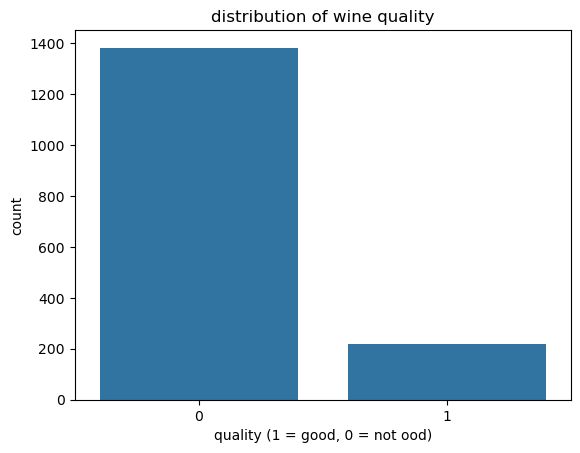

In [3]:
#classifying based on quality
df['quality_binary'] = np.where(df['quality'] >=7, 1 , 0)
df.head()

#plotting the distribution of quality
sns.countplot(x='quality_binary', data=df)
plt.title("distribution of wine quality")
plt.xlabel("quality (1 = good, 0 = not ood)")
plt.ylabel("count")
plt.show()

In [4]:
#task 3
x = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_scaled_df = pd.DataFrame(x_scaled, columns=x.columns)
print("Before Scaling:\n", x['pH'].head(5))
print("After Scaling:\n", x_scaled_df['pH'].head(5))

Before Scaling:
 0    3.51
1    3.20
2    3.26
3    3.16
4    3.51
Name: pH, dtype: float64
After Scaling:
 0    1.288643
1   -0.719933
2   -0.331177
3   -0.979104
4    1.288643
Name: pH, dtype: float64


In [5]:
#task 4
x_train, x_test, y_test, y_train = train_test_split(x_scaled, y, test_size=0.3, random_state=42)